# Gradient Descent

In this exercise, you will create the necessary functions to go through the steps of a single Gradient Descent Epoch. You will then combine the functions and create a loop through the entire Gradient Descent procedure.

## 1. Data Exploration

We will import for you the following dataset of ingredients with their mineral content

In [18]:
import pandas as pd

data = pd.read_csv("https://wagon-public-datasets.s3.amazonaws.com/05-Machine-Learning/04-Under-the-Hood/gradient_descent_ingredients_zinc_phosphorous.csv")
data.head()

,aliment,zinc,phosphorus
0,Durum wheat pre-cooked. whole grain. cooked. u...,0.120907,0.193784
1,Asian noodles. plain. cooked. unsalted,0.047859,0.060329
2,Rice. brown. cooked. unsalted,0.156171,0.201097
3,Rice. cooked. unsalted,0.065491,0.045704
4,Rice. parboiled. cooked. unsalted,0.025189,0.045704


👇 We can visualize a somewhat Linear relationship between the `Phosphorus` and `Zinc`.   

Let's use Gradient Descent to find the line of best fit between them! 

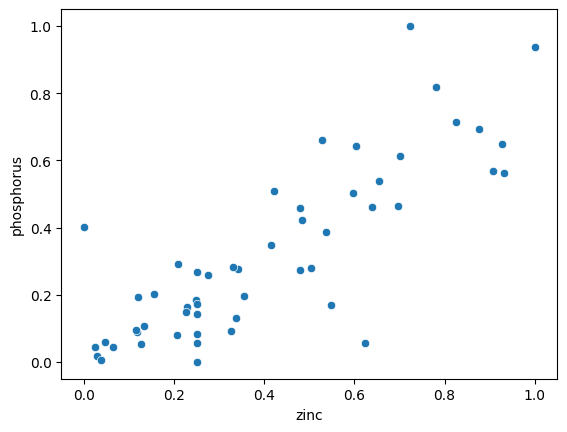

In [19]:
import seaborn as sns

sns.scatterplot(data=data, x='zinc', y='phosphorus');

❓ Create the two `np.Array`
- `data_X` for zinc
- `data_Y` for phosphorus

In [20]:
import numpy as np

# Create numpy arrays
data_X = data['zinc'].to_numpy()
data_Y = data['phosphorus'].to_numpy()

In [21]:
assert (data_X.shape == (53,))
assert (data_Y.shape == (53,))

## 2. Code one Epoch

In this section of the exercise, you will define the key functions used to update the parameters during one epoch $\color {red}{(k)}$ of gradient descent. Recall the formula below

$$
\beta_0^{\color {red}{(k+1)}} = \beta_0^{\color {red}{(k)}} - \eta \frac{\partial L}{\partial \beta_0}(\beta^{\color{red}{(k)}})
$$


$$
\beta_1^{\color {red}{(k+1)}} = \beta_1^{\color {red}{(k)}} - \eta \frac{\partial L}{\partial \beta_1}(\beta^{\color {red}{(k)}})
$$


### 2.1 Hypothesis Function

$$
\hat{y} =  a x + b
$$

❓ Define the hypothesis function of a Linear Regression. Let `a` be the slope and `b` the intercept.


In [22]:
def h(X,a,b):
    return a * X + b


### 2.2 Loss Function

$$
Sum\ Squares\ Loss = \sum_{i=0}^n (y^{(i)} - \hat{y}^{(i)} )^2
$$

❓ Define the SSR Loss Function for the Hypothesis Function using the equation above. Reuse the function `h` coded above when writing your new function.


In [23]:
def loss(X, Y, a, b):
    predictions = h(X, a, b)
    errors = predictions - Y
    return np.sum(errors ** 2)

❓ What would be the total Loss computed on all our ingredients dataset if:
- a = 1 
- b = 1

In [27]:
# Compute and print total loss
a = 1
b = 1
total_loss = loss(data_X, data_Y, a, b)
total_loss

63.868506986115456

⚠️ You should be getting 63.86. If not, something is wrong with your function. Fix it before moving on!

### 2.3 Gradient

$$
\frac{d\ SSR}{d\ slope}= \sum_{i=0}^n -2  x_i (y^{(i)} - \hat{y}^{(i)} )
$$

$$
\frac{d\ SSR}{d\ intercept}= \sum_{i=0}^n -2(y^{(i)} - \hat{y}^{(i)} ) 
$$

❓ Define a function to compute the partial derivatives of the Loss Function relative to parameter `a` and `b` at a given point.


<details>
<summary>💡 Hint</summary>
Again, you must re-use the Hypothesis Function in your new function to compute the predictions at given points.
</details>

In [28]:
def gradient(X, Y, a, b):
    predictions = h(X, a, b)
    errors = predictions - Y
    d_a = 2 * np.sum(errors * X)
    d_b = 2 * np.sum(errors)
    return d_a, d_b


❓ Using your function, what would be the partial derivatives of each parameter if:
- a = 1
- b = 1

In [30]:
a = 1
b = 1
partial_derivatives = gradient(data_X, data_Y, a, b)
partial_derivatives

(48.459065809109006, 115.17923733301406)

⚠️ You should be getting 48.45 and  115.17. If not, fix your function!

### 2.4 Step Sizes

$$
step\ size = gradient \cdot learning\ rate
$$

❓ Define a function that calculates the step sizes alongside each parameter (`a`,`b`), according to their derivatives (`d_a`, `d_b`) and a `learning_rate` equal to `0.01` by default

In [32]:
def step(d_a, d_b, learning_rate=0.01):
    step_a = learning_rate * d_a
    step_b = learning_rate * d_b
    return step_a, step_b


❓ What would be the steps (`step_a`, `step_b`) to take for the derivatives computed above for (`a`,`b`) = (1,1)?

In [34]:
a = 1
b = 1
steps = step(48.459065809109006, 115.17923733301406, learning_rate=0.01)
steps

(0.4845906580910901, 1.1517923733301405)

⚠️ The steps should be 0.48 for `a` and 1.15 for `b`

### 2.5 Update parameters (a, b)

$$
updated\ parameter = old\ parameter\ value - step\ size
$$

❓ Define a function that computes the updated parameter values from the old parameter values and the step sizes.

In [35]:
def update_params(a, b, step_a, step_b):
    a_new = a - step_a 
    b_new = b - step_b 
    return a_new , b_new
    

### 2.6 One full epoch

❓ Using the functions you just created, compute the updated parameters at the end of the first Epoch, had you started with parameters:
- a = 1
- b = 1

In [39]:
a = 1
b = 1
0.48
update_params(a, b, 0.4845906580910901, 1.1517923733301405)

(0.5154093419089099, -0.1517923733301405)

⚠️ You should be getting the following values:
   - updated_a = 0.51
   - updated_b = -0.15

## 3. Gradient Descent

❓ Now that you have the necessary functions for a Gradient Descent, loop through epochs until convergence.

- Initialize parameters `a = 1` and  `b = 1`
- Consider convergence to be **100 epochs**
- Don't forget to start each new epoch with the updated parameters
- Append the values for `loss`, `a`, and `b` at each epoch to their corresponding lists called `loss_history`, `a_history` and `b_history`

In [44]:
# Initialize parameters
a = 1
b = 1

# List to store history
loss_history = []
a_history = []
b_history = []

# Number of epochs for convergence
epochs = 100

# Loop through the epochs
for epoch in range(epochs):
    # Compute gradients for current parameters
    d_a, d_b = gradient(data_X, data_Y, a, b)
    
    # Compute step sizes
    step_a, step_b = step(d_a, d_b)
    
    # Update parameters
    a, b = update_params(a, b, step_a, step_b)
    
    # Calculate loss for current parameters and append to history
    current_loss = loss(data_X, data_Y, a, b)
    loss_history.append(current_loss)
    a_history.append(a)
    b_history.append(b)

    # Optionally, print the progress every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch {epoch+10}, Loss: {current_loss}, a: {a}, b: {b}")

# After 100 epochs, you can access loss_history, a_history, b_history for plotting or analysis
    

Epoch 10, Loss: 4.956802678221286, a: 0.5154093419089099, b: -0.1517923733301405
Epoch 20, Loss: 1.1061774212625193, a: 0.6908572504746171, b: 0.04072151480231099
Epoch 30, Loss: 1.0881159558681284, a: 0.7297825902031633, b: 0.023897654373459715
Epoch 40, Loss: 1.0835856008053724, a: 0.7492774973948976, b: 0.015471683875974845
Epoch 50, Loss: 1.082449252422271, a: 0.7590411158758447, b: 0.011251711938601302
Epoch 60, Loss: 1.0821642223021393, a: 0.7639310209625543, b: 0.009138226832377291
Epoch 70, Loss: 1.0820927282334272, a: 0.7663800281419817, b: 0.008079731809064263
Epoch 80, Loss: 1.082074795385282, a: 0.7676065624117752, b: 0.007549606609185155
Epoch 90, Loss: 1.082070297291267, a: 0.7682208465705213, b: 0.007284104437368382
Epoch 100, Loss: 1.0820691690349187, a: 0.7685284980051201, b: 0.007151133201034916


❓ What are the parameter values at the end of the 100 epochs? Save them to respective variables `a_100` and `b_100` 

In [42]:
a_100=0.768528498005120
b_100=0.007151133201034916

In [43]:
# 🧪 Test your code
from nbresult import ChallengeResult
result = ChallengeResult('descent',
                         a_100=a_100,
                         b_100=b_100)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /home/saranjthilak92/.pyenv/versions/3.12.9/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /home/saranjthilak92/code/saranjthilak/05-ML/04-Under-the-hood/data-batch-gradient-descent/tests
plugins: typeguard-4.4.2, anyio-4.8.0
collecting ... collected 2 items

test_descent.py::TestDescent::test_a PASSED                              [ 50%]
test_descent.py::TestDescent::test_b PASSED                              [100%]

============================== 2 passed in 0.03s ===============================


💯 You can commit your code:

git add tests/descent.pickle

git commit -m 'Completed descent step'

git push origin master



## 4. Visual check

❓ Wrap this iterative approach into a method `gradient_descent()` which returns your `new_a`, `new_b` and `history`, a dictionary containing these lists: 
- `loss_history`
- `a_history`
- `b_history`

In [ ]:
def gradient_descent(X, Y, a_init=1, b_init=1, learning_rate=0.001, n_epochs=100):
    pass  # YOUR CODE HERE
    return a, b, history

❓ Plot the line of best fit through Zinc and Phosphorus using the parameters of your Gradient Descent.

In [ ]:
# YOUR CODE HERE

## 5. Visualize your descent

🎯 Our goal is to plot our loss function and the gradient descent steps on a 2D surface using matplotlib's `contourf`

❓ Start by creating the data we need for the plot
- `range_a`: a range of 100 values for `a` equally spaced between -1 and 1
- `range_b`: a range of 100 values for `b` equally spaced between -1 and 1 
- `Z`: a 2D-array where each element `Z[j,i]` is equal to the value of the loss function at `a` = `range_a[i]` and `b` = `range_b[j]`

In [ ]:
# YOUR CODE HERE

In [ ]:
# YOUR CODE HERE

❓ Now, plot in one single subplot:
- your loss function as a 2D-surface using matplotlib [contourf](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.contourf.html) with 3 parameters
- all historical (a,b) points as a scatterplot with red dots to visualize your gradient descent!

Change your learning rate and observe its impact on the graph!

In [ ]:
# YOUR CODE HERE

❓ [optional] What about 3D? Try to plot the same data on a [plot.ly 3D contour plot](https://plotly.com/python/3d-surface-plots/) below

In [ ]:
import plotly.graph_objects as go

surface = go.Surface(x=range_a, y=range_b, z=Z)
scatter = go.Scatter3d(x=history['a'], y=history['b'], z=history['loss'], mode='markers')
fig = go.Figure(data=[surface, scatter])

#fig.update_layout(title='Loss Function', autosize=False, width=500, height=500)
fig.show()

❓ Plot the history of the `loss` values as a function of the number of `epochs`. Try with multiple variations of `learning_rate` from 0.001 to 0.01 and make sure to understand the difference

In [ ]:
# YOUR CODE HERE

## 6. With Sklearn...

❓ Using Sklearn, train a Linear Regression model on the same data. Compare its parameters to the ones computed by your Gradient Descent.

In [ ]:
# YOUR CODE HERE

They should be almost identical!

### 🏁 Congratulation! Please, push your exercise when you are done